<a href="https://colab.research.google.com/github/telmacarvalho/tcc-smishing/blob/main/data_process_smishing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA e tratamento dos dados

## Importa bibliotecas

In [11]:
# Manipulação de dados
import pandas as pd
import numpy as np

In [12]:
# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Bibliotecas para carregar o dataset do Hugging Face
!pip install datasets -q
from datasets import load_dataset

In [14]:
# Pré-processamento de texto
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 1. Extração dos dados da fonte

In [21]:
dataset_hf = load_dataset("MOZNLP/MOZ-Smishing")
dataset_hf

DatasetDict({
    test: Dataset({
        features: ['id', 'source', 'text', 'label'],
        num_rows: 2561
    })
})

In [22]:
df = pd.DataFrame(dataset_hf['test'])
df.head()

,id,source,text,label
0,1_0,sms,"Oi, peço para transferir aquele valor para meu...",Legitimate
1,2_0,sms,Bom dia babe..tudo bem? Não se esqueça de liga...,Legitimate
2,3_0,sms,AEN8AFWXJHC Confirmado. Compraste 19.00MT de ...,Legitimate
3,4_0,sms,"7GD04E51YZM. Caro Cliente, o codigo para efect...",Legitimate
4,5_0,sms,Bom dia babe. Está bem. Vou comprar.\nBoa viagem,Legitimate


### 1.2 Armazenamento do dados brusto na pasta raw

In [23]:
# Salva os dados brutos na pasta raw
file_path = '/content/drive/MyDrive/tcc/raw/data.csv'
df.to_csv(file_path, index=False)

print(f"Arquivo foi salvo com sucesso em: {file_path}")

Arquivo foi salvo com sucesso em: /content/drive/MyDrive/tcc/raw/data.csv


## 2. Análise dos dados

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2561 non-null   object
 1   source  2561 non-null   object
 2   text    2561 non-null   object
 3   label   2561 non-null   object
dtypes: object(4)
memory usage: 80.2+ KB


In [25]:
df.label.unique()

array(['Legitimate', 'Smishing'], dtype=object)

In [26]:
df.label.value_counts()

,count
label,
Legitimate,2009
Smishing,552


In [27]:
# Configuração de visualização
sns.set_style('whitegrid')
%matplotlib inline

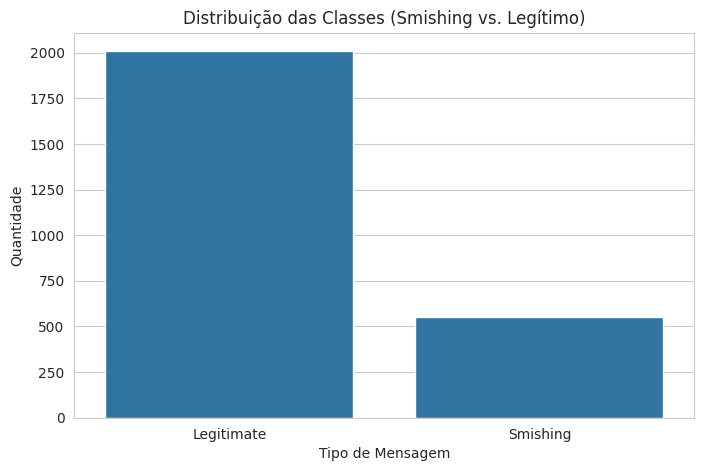

label
Legitimate    0.784459
Smishing      0.215541
Name: proportion, dtype: float64


In [28]:
# Análise da distribuição das classes
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribuição das Classes (Smishing vs. Legítimo)')
plt.xlabel('Tipo de Mensagem')
plt.ylabel('Quantidade')
plt.show()

print(df['label'].value_counts(normalize=True))

*Dados estão desbalanceados.*

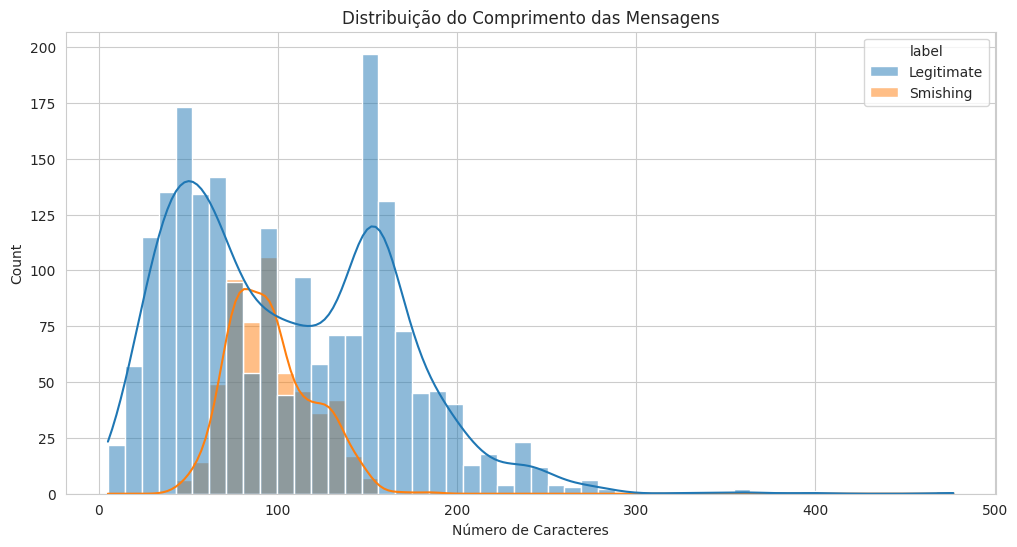

In [29]:
# Análise do comprimento das mensagens
df['comprimento'] = df['text'].str.len()

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='comprimento', hue='label', bins=50, kde=True)
plt.title('Distribuição do Comprimento das Mensagens')
plt.xlabel('Número de Caracteres')
plt.show()

*Mensagens smishing possuem a tendência de serem mais curtas que as légítimas.*

## 3. Pré-processamento e limpeza dos dados

In [30]:
# Função de limpeza e pré-processamento
stop_words = set(stopwords.words('portuguese'))
stemmer = RSLPStemmer()

def pre_processar(texto):
    # Converte para minúsculas
    texto = texto.lower()
    # Remove URLs
    texto = re.sub(r'http\S+|www\S+', '', texto)
    # Remove pontuação e números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    # Tokeniza e remove stopwords
    palavras = [palavra for palavra in texto.split() if palavra not in stop_words]
    # Aplica stemming
    palavras_stem = [stemmer.stem(palavra) for palavra in palavras]
    return ' '.join(palavras_stem)

In [31]:
# Aplica a função
df['texto_processado'] = df['text'].apply(pre_processar)
df[['text', 'texto_processado']].head()

,text,texto_processado
0,"Oi, peço para transferir aquele valor para meu...",oi peo transfer val mpes nmer
1,Bom dia babe..tudo bem? Não se esqueça de liga...,bom dia babetud bem esque lig pra tio boss h bj
2,AEN8AFWXJHC Confirmado. Compraste 19.00MT de ...,aenafwxjhc confirm compr mt credit pmo nov sal...
3,"7GD04E51YZM. Caro Cliente, o codigo para efect...",gdeyzm car client codig efectu levant cont mpe...
4,Bom dia babe. Está bem. Vou comprar.\nBoa viagem,bom dia bab est bem vou compr boa viag


## 4. Armazena os dados refinados

In [32]:
# Autoriza acesso ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Salva os dfs na pasta refined
file_path = '/content/drive/MyDrive/tcc/refined/data_processed.csv'
df.to_csv(file_path, index=False)

print(f"Arquivo foi salvo com sucesso em: {file_path}")

Arquivo foi salvo com sucesso em: /content/drive/MyDrive/tcc/refined/data_processed.csv
